# The Investors Dilemma

# Intro
## General
"Data analysis is a process of inspecting, cleansing, transforming, and modeling data with the goal of discovering useful information, informing conclusions, and supporting decision-making." ([Wikipedia](https://en.wikipedia.org/wiki/Data_analysis)).

In Data Analysis, there are some analysis paradigms : **Univariate, Bivariate, Multivariate**. We apply these paradigms to analyze the features (or statistical variables, or columns of the dataframe) of the dataset and to have a better understanding.

**Numeric features** are features with numbers that you can perform mathematical operations on. They are further divided into discrete (countable integers with clear boundaries) and continuous (can take any value, even decimals, within a range).

**Categorical features** are columns with a limited number of possible values. Examples are `sex, country, or age group`.

## Notebook overview

This notebook is a guide to start practicing Data Analysis.

# Setup

## Installation
Here is the section to install all the packages/libraries that will be needed to tackle the challlenge.

## Importation
Here is the section to import all the packages/libraries that will be used through this notebook.

In [ ]:
# Data handling
import pandas as pd
import numpy as np

# Vizualisation (Matplotlib, Plotly, Seaborn, etc. )
import matplotlib.pyplot as plt
import seaborn as sns


# Data Loading
Here is the section to load the datasets (train, eval, test) and the additional files

In [ ]:
df_2018 = pd.read_csv("D:\India Startup Funding/startup_funding2018.csv")

In [59]:
df_2019 = pd.read_csv("D:\India Startup Funding/startup_funding2019.csv")

In [60]:
df_2020 = pd.read_csv("D:\India Startup Funding/startup_funding2020.csv")

In [61]:
df_2021 = pd.read_csv("D:\India Startup Funding/startup_funding2021.csv")

# Exploratory Data Analysis: EDA
Here is the section to **inspect** the datasets in depth, **present** it, make **hypotheses** and **think** the *cleaning, processing and features creation*.

# Business Understanding

HYPOTHESIS

Null hypothesis-Investors interest in startups are directly correlated with the startup industry

Alternative hypotheses-Investors interest in startups are independent of startup industry

QUESTIONS

    Which startup industry/sector attracts more investors?
    Does investment amount correlate with the age of the startups?
    Does the location of the startup affects investors interest in investing?
    Which funding year saw investors investing more into startups?
    Which stage of funding receives the most funding?
    Is there a relationship between investor amount, location of startup and industry of startup?



# Problems with data

MAJOR ISSUES

    Wrong datatypes
    Missing values
    Combination of non-printable characters with strings (2018 data)
    Amount column having two different amount in the same row
    Misplaced values (the stage column having amount information and amount column having stage information, 2019-2021)
    Inconsistent column names

SOLUTIONS

    Change to appropriate datatype
    Replace empty rows with missing values and dropna values or fill with a mean or median
    Remove all non printable characters
    Delete those rows or fill with one value
    Rearrange values correctly
    Change column nam

# Dataset overview

Have a look at the loaded datsets using the following methods: `.head(), .info()`

In [62]:
#shape of data

df_2018.shape, df_2019.shape, df_2020.shape, df_2021.shape

((526, 6), (89, 9), (1055, 10), (1209, 9))

In [63]:
#check for duplicates

df_2018.duplicated().sum(), df_2019.duplicated().sum(), df_2020.duplicated().sum(), df_2021.duplicated().sum()

(1, 0, 3, 19)

In [64]:
#print out datatypes of all columns

df_2018.dtypes 
df_2019.dtypes 
df_2020.dtypes 
df_2021.dtypes

Company/Brand     object
Founded          float64
HeadQuarter       object
Sector            object
What it does      object
Founders          object
Investor          object
Amount($)         object
Stage             object
dtype: object

In [65]:
# check for missing values
df_2018.isna().sum()

Company Name     0
Industry         0
Round/Series     0
Amount           0
Location         0
About Company    0
dtype: int64

In [66]:
df_2019.isna().sum()

Company/Brand     0
Founded          29
HeadQuarter      19
Sector            5
What it does      0
Founders          3
Investor          0
Amount($)         0
Stage            46
dtype: int64

In [67]:
df_2020.isna().sum()

Company/Brand       0
Founded           212
HeadQuarter        94
Sector             13
What it does        0
Founders           12
Investor           38
Amount($)           3
Stage             464
Unnamed: 9       1053
dtype: int64

In [68]:
df_2021.isna().sum()

Company/Brand      0
Founded            1
HeadQuarter        1
Sector             0
What it does       0
Founders           4
Investor          62
Amount($)          3
Stage            428
dtype: int64

## Data cleaning

In [69]:
#Assign year of funding

df_2018["Funding year"] = 2018

#change column titles to be similar with other csv data columns and display all rows

df_2018.rename(columns = {"Company Name":"Company/Brand", "Industry":"Sector", "Location":"HeadQuarter", "About Company":"What it does", "Round/Series":"Stage"}, inplace=True)

pd.set_option('display.max_rows', 526)
df_2018.head(526)

#create 3 new empty columns

df_2018["Founded"] = np.nan
df_2018["Investor"] = np.nan
df_2018["Founders"] = np.nan

df_2018

,Company/Brand,Sector,Stage,Amount,HeadQuarter,What it does,Funding year,Founded,Investor,Founders
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018,NaN,NaN,NaN
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,2018,NaN,NaN,NaN
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,2018,NaN,NaN,NaN
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,2018,NaN,NaN,NaN
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,2018,NaN,NaN,NaN
5,Hasura,"Cloud Infrastructure, PaaS, SaaS",Seed,1600000,"Bengaluru, Karnataka, India",Hasura is a platform that allows developers to...,2018,NaN,NaN,NaN
6,Tripshelf,"Internet, Leisure, Marketplace",Seed,"₹16,000,000","Kalkaji, Delhi, India",Tripshelf is an online market place for holida...,2018,NaN,NaN,NaN
7,Hyperdata.IO,Market Research,Angel,"₹50,000,000","Hyderabad, Andhra Pradesh, India",Hyperdata combines advanced machine learning w...,2018,NaN,NaN,NaN
8,Freightwalla,"Information Services, Information Technology",Seed,—,"Mumbai, Maharashtra, India",Freightwalla is an international forwarder tha...,2018,NaN,NaN,NaN
9,Microchip Payments,Mobile Payments,Seed,—,"Bangalore, Karnataka, India",Microchip payments is a mobile-based payment a...,2018,NaN,NaN,NaN


In [70]:
df_2018["Stage"].unique()

array(['Seed', 'Series A', 'Angel', 'Series B', 'Pre-Seed',
       'Private Equity', 'Venture - Series Unknown', 'Grant',
       'Debt Financing', 'Post-IPO Debt', 'Series H', 'Series C',
       'Series E', 'Corporate Round', 'Undisclosed',
       'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593',
       'Series D', 'Secondary Market', 'Post-IPO Equity',
       'Non-equity Assistance', 'Funding Round'], dtype=object)

In [71]:
#find out if column contains a specific character

df_2018['Amount'].str.contains('₹').any()

True

In [72]:
#create new column denoting Amount column with rupees symbol 

df_2018["rup_data"] = df_2018['Amount'].str.contains('₹')
df_2018["rup_data"]

0      False
1       True
2       True
3      False
4      False
5      False
6       True
7       True
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15      True
16     False
17     False
18     False
19      True
20     False
21     False
22      True
23      True
24     False
25     False
26     False
27     False
28     False
29     False
30      True
31     False
32     False
33     False
34     False
35     False
36     False
37      True
38     False
39     False
40     False
41     False
42      True
43     False
44     False
45     False
46     False
47     False
48     False
49      True
50      True
51      True
52      True
53     False
54      True
55      True
56     False
57     False
58      True
59      True
60     False
61     False
62     False
63     False
64      True
65     False
66      True
67     False
68     False
69      True
70      True
71     False
72     False
73     False
74     False
75     False
76     False

In [73]:
#Split currency amount and symbol

df_2018[['currency', 'Amount']] = df_2018['Amount'].str.extract(r'(\D*)(\d.*)')

df_2018

,Company/Brand,Sector,Stage,Amount,HeadQuarter,What it does,Funding year,Founded,Investor,Founders,rup_data,currency
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018,NaN,NaN,NaN,False,
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,2018,NaN,NaN,NaN,True,₹
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,2018,NaN,NaN,NaN,True,₹
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,2018,NaN,NaN,NaN,False,
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,NaN,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,2018,NaN,NaN,NaN,False,NaN
5,Hasura,"Cloud Infrastructure, PaaS, SaaS",Seed,1600000,"Bengaluru, Karnataka, India",Hasura is a platform that allows developers to...,2018,NaN,NaN,NaN,False,
6,Tripshelf,"Internet, Leisure, Marketplace",Seed,"16,000,000","Kalkaji, Delhi, India",Tripshelf is an online market place for holida...,2018,NaN,NaN,NaN,True,₹
7,Hyperdata.IO,Market Research,Angel,"50,000,000","Hyderabad, Andhra Pradesh, India",Hyperdata combines advanced machine learning w...,2018,NaN,NaN,NaN,True,₹
8,Freightwalla,"Information Services, Information Technology",Seed,NaN,"Mumbai, Maharashtra, India",Freightwalla is an international forwarder tha...,2018,NaN,NaN,NaN,False,NaN
9,Microchip Payments,Mobile Payments,Seed,NaN,"Bangalore, Karnataka, India",Microchip payments is a mobile-based payment a...,2018,NaN,NaN,NaN,False,NaN


In [74]:
#remove special characters in numeric column and replace empty rows with NaN values
df_2018["Amount"] = df_2018["Amount"].str.replace('\W', '', regex=True)
#df_2018["Stage"] = df_2018["Stage"].str.replace(["https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593", "Undisclosed"], np.NaN, regex=True)


In [75]:
# convert numeric column from string to float

df_2018["Amount"] = df_2018["Amount"].astype("float")
pd.options.display.float_format = '{:.1f}'.format

# conversion from rupies to all dollars
df_2018.loc[df_2018["rup_data"] == True, 'rup_data'] = df_2018["Amount"].multiply(0.012)
df_2018.loc[df_2018["rup_data"] == False, 'rup_data'] = df_2018["Amount"]


df_2018

,Company/Brand,Sector,Stage,Amount,HeadQuarter,What it does,Funding year,Founded,Investor,Founders,rup_data,currency
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000.0,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018,NaN,NaN,NaN,250000.0,
1,Happy Cow Dairy,"Agriculture, Farming",Seed,40000000.0,"Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,2018,NaN,NaN,NaN,480000.0,₹
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,65000000.0,"Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,2018,NaN,NaN,NaN,780000.0,₹
3,PayMe India,"Financial Services, FinTech",Angel,2000000.0,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,2018,NaN,NaN,NaN,2000000.0,
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,NaN,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,2018,NaN,NaN,NaN,NaN,NaN
5,Hasura,"Cloud Infrastructure, PaaS, SaaS",Seed,1600000.0,"Bengaluru, Karnataka, India",Hasura is a platform that allows developers to...,2018,NaN,NaN,NaN,1600000.0,
6,Tripshelf,"Internet, Leisure, Marketplace",Seed,16000000.0,"Kalkaji, Delhi, India",Tripshelf is an online market place for holida...,2018,NaN,NaN,NaN,192000.0,₹
7,Hyperdata.IO,Market Research,Angel,50000000.0,"Hyderabad, Andhra Pradesh, India",Hyperdata combines advanced machine learning w...,2018,NaN,NaN,NaN,600000.0,₹
8,Freightwalla,"Information Services, Information Technology",Seed,NaN,"Mumbai, Maharashtra, India",Freightwalla is an international forwarder tha...,2018,NaN,NaN,NaN,NaN,NaN
9,Microchip Payments,Mobile Payments,Seed,NaN,"Bangalore, Karnataka, India",Microchip payments is a mobile-based payment a...,2018,NaN,NaN,NaN,NaN,NaN


In [76]:
df_2018_copy = df_2018.drop(["Amount", "currency"], axis=1)
df_2018_copy

,Company/Brand,Sector,Stage,HeadQuarter,What it does,Funding year,Founded,Investor,Founders,rup_data
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018,NaN,NaN,NaN,250000.0
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,2018,NaN,NaN,NaN,480000.0
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,2018,NaN,NaN,NaN,780000.0
3,PayMe India,"Financial Services, FinTech",Angel,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,2018,NaN,NaN,NaN,2000000.0
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,2018,NaN,NaN,NaN,NaN
5,Hasura,"Cloud Infrastructure, PaaS, SaaS",Seed,"Bengaluru, Karnataka, India",Hasura is a platform that allows developers to...,2018,NaN,NaN,NaN,1600000.0
6,Tripshelf,"Internet, Leisure, Marketplace",Seed,"Kalkaji, Delhi, India",Tripshelf is an online market place for holida...,2018,NaN,NaN,NaN,192000.0
7,Hyperdata.IO,Market Research,Angel,"Hyderabad, Andhra Pradesh, India",Hyperdata combines advanced machine learning w...,2018,NaN,NaN,NaN,600000.0
8,Freightwalla,"Information Services, Information Technology",Seed,"Mumbai, Maharashtra, India",Freightwalla is an international forwarder tha...,2018,NaN,NaN,NaN,NaN
9,Microchip Payments,Mobile Payments,Seed,"Bangalore, Karnataka, India",Microchip payments is a mobile-based payment a...,2018,NaN,NaN,NaN,NaN


In [77]:
df_2018_copy.rename(columns = {"rup_data":"Amount($)"}, inplace=True)

# convert numeric column from string to float
df_2018_copy["Amount($)"] = df_2018_copy["Amount($)"].astype('float')

In [78]:
df_2018_copy = df_2018_copy.drop_duplicates(keep='first')
df_2018_copy

,Company/Brand,Sector,Stage,HeadQuarter,What it does,Funding year,Founded,Investor,Founders,Amount($)
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018,NaN,NaN,NaN,250000.0
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,2018,NaN,NaN,NaN,480000.0
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,2018,NaN,NaN,NaN,780000.0
3,PayMe India,"Financial Services, FinTech",Angel,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,2018,NaN,NaN,NaN,2000000.0
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,2018,NaN,NaN,NaN,NaN
5,Hasura,"Cloud Infrastructure, PaaS, SaaS",Seed,"Bengaluru, Karnataka, India",Hasura is a platform that allows developers to...,2018,NaN,NaN,NaN,1600000.0
6,Tripshelf,"Internet, Leisure, Marketplace",Seed,"Kalkaji, Delhi, India",Tripshelf is an online market place for holida...,2018,NaN,NaN,NaN,192000.0
7,Hyperdata.IO,Market Research,Angel,"Hyderabad, Andhra Pradesh, India",Hyperdata combines advanced machine learning w...,2018,NaN,NaN,NaN,600000.0
8,Freightwalla,"Information Services, Information Technology",Seed,"Mumbai, Maharashtra, India",Freightwalla is an international forwarder tha...,2018,NaN,NaN,NaN,NaN
9,Microchip Payments,Mobile Payments,Seed,"Bangalore, Karnataka, India",Microchip payments is a mobile-based payment a...,2018,NaN,NaN,NaN,NaN


In [79]:
df_2018_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 525 entries, 0 to 525
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  525 non-null    object 
 1   Sector         525 non-null    object 
 2   Stage          525 non-null    object 
 3   HeadQuarter    525 non-null    object 
 4   What it does   525 non-null    object 
 5   Funding year   525 non-null    int64  
 6   Founded        0 non-null      float64
 7   Investor       0 non-null      float64
 8   Founders       0 non-null      float64
 9   Amount($)      377 non-null    float64
dtypes: float64(4), int64(1), object(5)
memory usage: 45.1+ KB


In [80]:
# change the 3 empty columns created to strings

df_2018_copy[["Founded","Investor", "Founders" ]] = df_2018_copy[["Founded","Investor", "Founders"]].fillna('')

df_2018_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 525 entries, 0 to 525
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  525 non-null    object 
 1   Sector         525 non-null    object 
 2   Stage          525 non-null    object 
 3   HeadQuarter    525 non-null    object 
 4   What it does   525 non-null    object 
 5   Funding year   525 non-null    int64  
 6   Founded        525 non-null    object 
 7   Investor       525 non-null    object 
 8   Founders       525 non-null    object 
 9   Amount($)      377 non-null    float64
dtypes: float64(1), int64(1), object(8)
memory usage: 45.1+ KB


C:\Users\clali\AppData\Local\Temp\ipykernel_22264\3614371968.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018_copy[["Founded","Investor", "Founders" ]] = df_2018_copy[["Founded","Investor", "Founders"]].fillna('')


In [81]:
#add the funding year
df_2019["Funding year"] = 2019
df_2019.replace([""], np.NaN, inplace=True)

#remove special characters in numeric column and replace empty rows with NaN values
df_2019["Amount($)"] = df_2019["Amount($)"].str.replace('\W', '', regex=True)
df_2019.replace(["Undisclosed","Undiclsosed", "Undislosed"], np.NaN, inplace=True)

# convert numeric column from string to float
df_2019["Amount($)"] = df_2019["Amount($)"].astype('float')

df_2019

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Funding year
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,6300000.0,NaN,2019
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,150000000.0,Series C,2019
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey",28000000.0,Fresh funding,2019
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...",30000000.0,Series D,2019
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),6000000.0,NaN,2019
5,FlytBase,NaN,Pune,Technology,A drone automation platform,Nitin Gupta,NaN,NaN,NaN,2019
6,Finly,NaN,Bangalore,SaaS,It builds software products that makes work si...,"Vivek AG, Veekshith C Rai","Social Capital, AngelList India, Gemba Capital...",NaN,NaN,2019
7,Kratikal,2013.0,Noida,Technology,It is a product-based cybersecurity solutions ...,"Pavan Kushwaha, Paratosh Bansal, Dip Jung Thapa","Gilda VC, Art Venture, Rajeev Chitrabhanu.",1000000.0,Pre series A,2019
8,Quantiphi,NaN,NaN,AI & Tech,It is an AI and big data services company prov...,Renuka Ramnath,Multiples Alternate Asset Management,20000000.0,Series A,2019
9,Lenskart,2010.0,Delhi,E-commerce,It is a eyewear company,"Peyush Bansal, Amit Chaudhary, Sumeet Kapahi",SoftBank,275000000.0,Series G,2019


In [82]:
df_2019["Stage"].unique()

array([nan, 'Series C', 'Fresh funding', 'Series D', 'Pre series A',
       'Series A', 'Series G', 'Series B', 'Post series A',
       'Seed funding', 'Seed fund', 'Series E', 'Series F', 'Series B+',
       'Seed round', 'Pre-series A'], dtype=object)

In [83]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       86 non-null     object 
 7   Amount($)      77 non-null     float64
 8   Stage          43 non-null     object 
 9   Funding year   89 non-null     int64  
dtypes: float64(2), int64(1), object(7)
memory usage: 7.1+ KB


In [84]:
df_2019_copy = df_2019.copy()
df_2019_copy = df_2019.drop_duplicates(keep='first')
df_2019_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89 entries, 0 to 88
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       86 non-null     object 
 7   Amount($)      77 non-null     float64
 8   Stage          43 non-null     object 
 9   Funding year   89 non-null     int64  
dtypes: float64(2), int64(1), object(7)
memory usage: 7.6+ KB


In [85]:
df_2020["Funding year"] = 2020
del df_2020["Unnamed: 9"]

df_2020

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Funding year
0,Aqgromalin,2019,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,"$200,000",NaN,2020
1,Krayonnz,2019,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,"$100,000",Pre-seed,2020
2,PadCare Labs,2018,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,Undisclosed,Pre-seed,2020
3,NCOME,2020,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital","$400,000",NaN,2020
4,Gramophone,2016,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge","$340,000",NaN,2020
...,...,...,...,...,...,...,...,...,...,...
1050,Leverage Edu,NaN,Delhi,Edtech,AI enabled marketplace that provides career gu...,Akshay Chaturvedi,"DSG Consumer Partners, Blume Ventures","$1,500,000",NaN,2020
1051,EpiFi,NaN,NaN,Fintech,It offers customers with a single interface fo...,"Sujith Narayanan, Sumit Gwalani","Sequoia India, Ribbit Capital","$13,200,000",Seed Round,2020
1052,Purplle,2012,Mumbai,Cosmetics,Online makeup and beauty products retailer,"Manish Taneja, Rahul Dash",Verlinvest,"$8,000,000",NaN,2020
1053,Shuttl,2015,Delhi,Transport,App based bus aggregator serice,"Amit Singh, Deepanshu Malviya",SIG Global India Fund LLP.,"$8,043,000",Series C,2020


In [86]:
df_2020["Stage"].unique()

array([nan, 'Pre-seed', 'Seed', 'Pre-series A', 'Pre-series', 'Series C',
       'Series A', 'Series B', 'Debt', 'Pre-series C', 'Pre-series B',
       'Series E', 'Bridge', 'Series D', 'Series B2', 'Series F',
       'Pre- series A', 'Edge', 'Series H', 'Pre-Series B', 'Seed A',
       'Series A-1', 'Seed Funding', 'Pre-Seed', 'Seed round',
       'Pre-seed Round', 'Seed Round & Series A', 'Pre Series A',
       'Pre seed Round', 'Angel Round', 'Pre series A1', 'Series E2',
       'Pre series A', 'Seed Round', 'Bridge Round', 'Pre seed round',
       'Pre series B', 'Pre series C', 'Seed Investment', 'Series D1',
       'Mid series', 'Series C, D', 'Seed funding'], dtype=object)

In [87]:
#remove special characters in numeric column and replace empty rows with NaN values
df_2020["Amount($)"] = df_2020["Amount($)"].str.replace('\W', '', regex=True)
df_2020.replace(["Undisclosed","Undiclsosed", "Undislosed"], np.NaN, inplace=True)
df_2020.replace(["800000000to850000000"], 825000000, inplace=True)

#convert numeric column from string to float
df_2020["Amount($)"] = df_2020["Amount($)"].astype('float')
df_2020

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Funding year
0,Aqgromalin,2019,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,NaN,2020
1,Krayonnz,2019,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,2020
2,PadCare Labs,2018,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,2020
3,NCOME,2020,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,NaN,2020
4,Gramophone,2016,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,NaN,2020
...,...,...,...,...,...,...,...,...,...,...
1050,Leverage Edu,NaN,Delhi,Edtech,AI enabled marketplace that provides career gu...,Akshay Chaturvedi,"DSG Consumer Partners, Blume Ventures",1500000.0,NaN,2020
1051,EpiFi,NaN,NaN,Fintech,It offers customers with a single interface fo...,"Sujith Narayanan, Sumit Gwalani","Sequoia India, Ribbit Capital",13200000.0,Seed Round,2020
1052,Purplle,2012,Mumbai,Cosmetics,Online makeup and beauty products retailer,"Manish Taneja, Rahul Dash",Verlinvest,8000000.0,NaN,2020
1053,Shuttl,2015,Delhi,Transport,App based bus aggregator serice,"Amit Singh, Deepanshu Malviya",SIG Global India Fund LLP.,8043000.0,Series C,2020


In [88]:
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  1055 non-null   object 
 1   Founded        843 non-null    object 
 2   HeadQuarter    961 non-null    object 
 3   Sector         1042 non-null   object 
 4   What it does   1055 non-null   object 
 5   Founders       1043 non-null   object 
 6   Investor       1007 non-null   object 
 7   Amount($)      807 non-null    float64
 8   Stage          591 non-null    object 
 9   Funding year   1055 non-null   int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 82.5+ KB


In [89]:
df_2020_copy = df_2020.copy()
df_2020_copy = df_2020.drop_duplicates(keep='first')
df_2020_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1052 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  1052 non-null   object 
 1   Founded        840 non-null    object 
 2   HeadQuarter    958 non-null    object 
 3   Sector         1039 non-null   object 
 4   What it does   1052 non-null   object 
 5   Founders       1040 non-null   object 
 6   Investor       1004 non-null   object 
 7   Amount($)      805 non-null    float64
 8   Stage          590 non-null    object 
 9   Funding year   1052 non-null   int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 90.4+ KB


In [90]:
df_2021["Funding year"] = 2021
df_2021

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Funding year
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A,2021
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",NaN,2021
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D,2021
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C,2021
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed,2021
...,...,...,...,...,...,...,...,...,...,...
1204,Gigforce,2019.0,Gurugram,Staffing & Recruiting,A gig/on-demand staffing company.,"Chirag Mittal, Anirudh Syal",Endiya Partners,$3000000,Pre-series A,2021
1205,Vahdam,2015.0,New Delhi,Food & Beverages,VAHDAM is among the world’s first vertically i...,Bala Sarda,IIFL AMC,$20000000,Series D,2021
1206,Leap Finance,2019.0,Bangalore,Financial Services,International education loans for high potenti...,"Arnav Kumar, Vaibhav Singh",Owl Ventures,$55000000,Series C,2021
1207,CollegeDekho,2015.0,Gurugram,EdTech,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Winter Capital, ETS, Man Capital",$26000000,Series B,2021


In [91]:
#check stage column with numbers
misplaced = df_2021.loc[[98, 111, 538, 551, 674, 677]]
misplaced

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Funding year
98,FanPlay,2020.0,Computer Games,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",Upsparks,$1200000,2021
111,FanPlay,2020.0,Computer Games,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",Upsparks,$1200000,2021
538,Little Leap,2020.0,New Delhi,EdTech,Soft Skills that make Smart Leaders,Holistic Development Programs for children in ...,Vishal Gupta,ah! Ventures,$300000,2021
551,BHyve,2020.0,Mumbai,Human Resources,A Future of Work Platform for diffusing Employ...,Backed by 100x.VC,"Omkar Pandharkame, Ketaki Ogale","ITO Angel Network, LetsVenture",$300000,2021
674,MYRE Capital,2020.0,Mumbai,Commercial Real Estate,Democratising Real Estate Ownership,Own rent yielding commercial properties,Aryaman Vir,NaN,$6000000,2021
677,Saarthi Pedagogy,2015.0,Ahmadabad,EdTech,"India's fastest growing Pedagogy company, serv...",Pedagogy,Sushil Agarwal,"JITO Angel Network, LetsVenture",$1000000,2021


In [92]:
#rearrange stage and amount column with the right entities

df_2021.loc[98,["Stage", "Amount($)"]] = ["Upsparks", "$1200000"]
df_2021.loc[111,["Stage", "Amount($)"]] = ["Upsparks", "$1200000"]
df_2021.loc[538,["Stage", "Amount($)"]] = ["ah! Ventures", "$300000"]
df_2021.loc[551,["Stage", "Amount($)"]] = ["ITO Angel Network, LetsVenture", "$300000"]
df_2021.loc[674,["Stage", "Amount($)"]] = ["NaN", "$6000000"]
df_2021.loc[677,["Stage", "Amount($)"]] = ["JITO Angel Network, LetsVenture", "$1200000"]

In [93]:
#check if corrections are made in the stage column

df_2021["Stage"].unique()

array(['Pre-series A', nan, 'Series D', 'Series C', 'Seed', 'Series B',
       'Series E', 'Pre-seed', 'Series A', 'Pre-series B', 'Debt',
       'Upsparks', 'Bridge', 'Seed+', 'Series F2', 'Series A+',
       'Series G', 'Series F', 'Series H', 'Series B3', 'PE', 'Series F1',
       'Pre-series A1', 'ah! Ventures', 'ITO Angel Network, LetsVenture',
       'Early seed', 'Series D1', 'NaN',
       'JITO Angel Network, LetsVenture', 'Seies A', 'Pre-series',
       'Series A2', 'Series I'], dtype=object)

In [94]:
df_2021["Amount($)"].unique()

array(['$1,200,000', '$120,000,000', '$30,000,000', '$51,000,000',
       '$2,000,000', '$188,000,000', '$200,000', 'Undisclosed',
       '$1,000,000', '$3,000,000', '$100,000', '$700,000', '$9,000,000',
       '$40,000,000', '$49,000,000', '$400,000', '$300,000',
       '$25,000,000', '$160,000,000', '$150,000', '$1,800,000',
       '$5,000,000', '$850,000', '$53,000,000', '$500,000', '$1,100,000',
       '$6,000,000', '$800,000', '$10,000,000', '$21,000,000',
       '$7,500,000', '$26,000,000', '$7,400,000', '$1,500,000',
       '$600,000', '$800,000,000', '$17,000,000', '$3,500,000',
       '$15,000,000', '$215,000,000', '$2,500,000', '$350,000,000',
       '$5,500,000', '$83,000,000', '$110,000,000', '$500,000,000',
       '$65,000,000', '$150,000,000,000', '$300,000,000', '$2,200,000',
       '$35,000,000', '$140,000,000', '$4,000,000', '$13,000,000', nan,
       '$Undisclosed', '$2000000', '$800000', '$6000000', '$2500000',
       '$9500000', '$13000000', '$5000000', '$8000000', 

In [95]:
#remove special characters in numeric column and replace empty rows with NaN values
df_2021["Amount($)"] = df_2021["Amount($)"].str.replace('\W', '', regex=True)
df_2021.replace(['undisclosed','Undisclosed','PreseriesA','Seed', 'SeriesC', ''], np.NaN, inplace=True)

#convert numeric column from string to float
df_2021["Amount($)"] = df_2021["Amount($)"].astype('float')


In [96]:
df_2021

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Funding year
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First",1200000.0,Pre-series A,2021
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management",120000000.0,NaN,2021
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital",30000000.0,Series D,2021
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital",51000000.0,Series C,2021
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal",2000000.0,NaN,2021
...,...,...,...,...,...,...,...,...,...,...
1204,Gigforce,2019.0,Gurugram,Staffing & Recruiting,A gig/on-demand staffing company.,"Chirag Mittal, Anirudh Syal",Endiya Partners,3000000.0,Pre-series A,2021
1205,Vahdam,2015.0,New Delhi,Food & Beverages,VAHDAM is among the world’s first vertically i...,Bala Sarda,IIFL AMC,20000000.0,Series D,2021
1206,Leap Finance,2019.0,Bangalore,Financial Services,International education loans for high potenti...,"Arnav Kumar, Vaibhav Singh",Owl Ventures,55000000.0,Series C,2021
1207,CollegeDekho,2015.0,Gurugram,EdTech,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Winter Capital, ETS, Man Capital",26000000.0,Series B,2021


In [97]:
df_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What it does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount($)      1062 non-null   float64
 8   Stage          535 non-null    object 
 9   Funding year   1209 non-null   int64  
dtypes: float64(2), int64(1), object(7)
memory usage: 94.6+ KB


In [98]:

df_2021_copy = df_2021.copy()
df_2021_copy = df_2021.drop_duplicates(keep='first')
df_2021_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1189 entries, 0 to 1208
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  1189 non-null   object 
 1   Founded        1188 non-null   float64
 2   HeadQuarter    1188 non-null   object 
 3   Sector         1189 non-null   object 
 4   What it does   1189 non-null   object 
 5   Founders       1185 non-null   object 
 6   Investor       1128 non-null   object 
 7   Amount($)      1044 non-null   float64
 8   Stage          528 non-null    object 
 9   Funding year   1189 non-null   int64  
dtypes: float64(2), int64(1), object(7)
memory usage: 102.2+ KB


In [99]:
#Combine all 4 dataset

all_data = [df_2018_copy, df_2019_copy, df_2020_copy, df_2021_copy]
combined_df = pd.concat(all_data)
combined_df.sort_values(by="Sector", ascending=True, inplace=True)
combined_df

,Company/Brand,Sector,Stage,HeadQuarter,What it does,Funding year,Founded,Investor,Founders,Amount($)
139,Chizel,"3D Printing, Manufacturing, Product Design",Seed,"Pune, Maharashtra, India",Chizel is a worlds most advanced cloud platfor...,2018,,,,NaN
647,Jiffy ai,AI,Series A,NaN,Enterprise automation startup,2020,2018,Nexus Venture Partners,Babu Sivadasan,18000000.0
528,DocSumo,AI,Seed round,Mumbai,Platform helps to automate and analyse financi...,2020,2019,"Better Capital, TechStars, Barclays.","Rushabh Sheth, Bikram Dahl",220000.0
777,Yellow Messenger,AI,Series B,Bangalore,It offers conversational chatbots,2020,NaN,"Lightspeed Venture Partners, Lightspeed India ...",Raghavendra Kumar Ravinutala,20000000.0
533,Wobot Intelligence,AI,Pre Series A,Delhi,AI backed video analytics platform,2020,NaN,Sequoia Capital India,"Adit Chhabra, Tapan Dixit,Tanay Dixit.",2500000.0
...,...,...,...,...,...,...,...,...,...,...
809,Kitchens Centre,NaN,Seed Round,Delhi,Offers solutions to cloud kitchens by providin...,2020,2019,AngelList India,Lakshay Jain,500000.0
918,Innoviti,NaN,NaN,Bangalore,Digital payments solutions company,2020,NaN,FMO,Rajeev Agrawal,5000000.0
926,Brick&Bolt,NaN,Pre series A,Bangalore,Operates in the residential construction space,2020,2018,Surge,"Jayesh Rajpurohit, Arpit Rajpurohit",1500000.0
1012,Toddle,NaN,NaN,Bengaluru,Collaboration and productivity platform for te...,2020,NaN,Matrix Partners India,"Deepanshu Arora, Parita Parekh",NaN


Dive into combined data

In [100]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2855 entries, 139 to 1031
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  2855 non-null   object 
 1   Sector         2837 non-null   object 
 2   Stage          1686 non-null   object 
 3   HeadQuarter    2741 non-null   object 
 4   What it does   2855 non-null   object 
 5   Funding year   2855 non-null   int64  
 6   Founded        2613 non-null   object 
 7   Investor       2743 non-null   object 
 8   Founders       2836 non-null   object 
 9   Amount($)      2303 non-null   float64
dtypes: float64(1), int64(1), object(8)
memory usage: 245.4+ KB


In [101]:
#Format some column by delimiter. Keep only one, preferably the first.

combined_df["Sector"] = combined_df["Sector"].str.split(',').str[0]
combined_df["HeadQuarter"] = combined_df["HeadQuarter"].str.split(',').str[0]
combined_df["Founded"] = combined_df["Founded"].str.split('.').str[0]
combined_df["Sector"] = combined_df["Sector"].str.capitalize()
combined_df

,Company/Brand,Sector,Stage,HeadQuarter,What it does,Funding year,Founded,Investor,Founders,Amount($)
139,Chizel,3d printing,Seed,Pune,Chizel is a worlds most advanced cloud platfor...,2018,,,,NaN
647,Jiffy ai,Ai,Series A,NaN,Enterprise automation startup,2020,2018,Nexus Venture Partners,Babu Sivadasan,18000000.0
528,DocSumo,Ai,Seed round,Mumbai,Platform helps to automate and analyse financi...,2020,2019,"Better Capital, TechStars, Barclays.","Rushabh Sheth, Bikram Dahl",220000.0
777,Yellow Messenger,Ai,Series B,Bangalore,It offers conversational chatbots,2020,NaN,"Lightspeed Venture Partners, Lightspeed India ...",Raghavendra Kumar Ravinutala,20000000.0
533,Wobot Intelligence,Ai,Pre Series A,Delhi,AI backed video analytics platform,2020,NaN,Sequoia Capital India,"Adit Chhabra, Tapan Dixit,Tanay Dixit.",2500000.0
...,...,...,...,...,...,...,...,...,...,...
809,Kitchens Centre,NaN,Seed Round,Delhi,Offers solutions to cloud kitchens by providin...,2020,2019,AngelList India,Lakshay Jain,500000.0
918,Innoviti,NaN,NaN,Bangalore,Digital payments solutions company,2020,NaN,FMO,Rajeev Agrawal,5000000.0
926,Brick&Bolt,NaN,Pre series A,Bangalore,Operates in the residential construction space,2020,2018,Surge,"Jayesh Rajpurohit, Arpit Rajpurohit",1500000.0
1012,Toddle,NaN,NaN,Bengaluru,Collaboration and productivity platform for te...,2020,NaN,Matrix Partners India,"Deepanshu Arora, Parita Parekh",NaN


In [102]:
combined_df["Sector"].unique()

array(['3d printing', 'Ai', 'Ai & data science', 'Ai & debt',
       'Ai & deep learning', 'Ai & media', 'Ai & tech', 'Ai chatbot',
       'Ai company', 'Ai platform', 'Ai robotics', 'Ai startup',
       'Ai health', 'Api platform', 'Ar platform', 'Ar startup', 'Ar/vr',
       'Ar/vr startup', 'Accomodation', 'Accounting', 'Ad-tech',
       'Advertisement', 'Advertising', 'Advisory firm', 'Aeorspace',
       'Aero company', 'Aerospace', 'Agtech', 'Agri tech', 'Agritech',
       'Agriculture', 'Agritech startup', 'Agritech/commerce',
       'Air transportation', 'Alternative medicine', 'Analytics',
       'Android', 'Apparel & fashion', 'Appliance', 'Apps',
       'Artificial intelligence', 'Arts & crafts', 'Audio',
       'Augmented reality', 'Auto-tech', 'Automation', 'Automation tech',
       'Automobile', 'Automobile & technology', 'Automobile technology',
       'Automobiles', 'Automotive', 'Automotive startup',
       'Automotive and rentals', 'Automotive company', 'Automotive tec

In [167]:
combined_df["Founded"].replace(['','-','nan'], np.NaN, inplace=True)

In [168]:
combined_df["Founded"].unique()


array([nan, '2018', '2019', '2016', '2015', '2017', '2014', '2012',
       '2010', '2013', '1982', '2020', '2001', '2009', '2006', '2011',
       '1999', '2007', '2008', '2005', '1994', '1998', '1995', '1978',
       '2004', '1973', '2002'], dtype=object)

In [104]:
combined_df.isna().sum()

Company/Brand       0
Sector             18
Stage            1169
HeadQuarter       114
What it does        0
Funding year        0
Founded          1490
Investor          112
Founders           19
Amount($)         552
dtype: int64

In [105]:
combined_df.duplicated().sum()

0

In [106]:
combined_df["Amount($)"] = combined_df["Amount($)"].fillna(0)

## Univariate Analysis

‘Univariate analysis’ is the analysis of one variable at a time. This analysis might be done by computing some statistical indicators and by plotting some charts respectively using the pandas dataframe's method `.describe()` and one of the plotting libraries like  [Seaborn](https://seaborn.pydata.org/), [Matplotlib](https://matplotlib.org/), [Plotly](https://seaborn.pydata.org/), etc.

Please, read [this article](https://towardsdatascience.com/8-seaborn-plots-for-univariate-exploratory-data-analysis-eda-in-python-9d280b6fe67f) to know more about the charts.

In [172]:

combined_df.describe()

,Funding year,Amount($)
count,2855.0,2855.0
mean,2020.0,31166464122.3
std,1.1,1660049170280.6
min,2018.0,0.0
25%,2020.0,200000.0
50%,2020.0,1500000.0
75%,2021.0,8000000.0
max,2021.0,88700023000000.0


## Multivariate Analysis

Multivariate analysis’ is the analysis of more than one variable and aims to study the relationships among them. This analysis might be done by computing some statistical indicators like the `correlation` and by plotting some charts.

Please, read [this article](https://towardsdatascience.com/10-must-know-seaborn-functions-for-multivariate-data-analysis-in-python-7ba94847b117) to know more about the charts.

In [163]:
# Which startup industry/sector attracts more investors?

sector_investor = combined_df.groupby(["Sector"]).count()["Investor"].sort_values(ascending=False).reset_index().head(10)
sector_investor

,Sector,Investor
0,Fintech,243
1,Edtech,215
2,E-commerce,92
3,Financial services,84
4,Agritech,61
5,Healthcare,61
6,Healthtech,59
7,Automotive,45
8,Food & beverages,36
9,Logistics,35


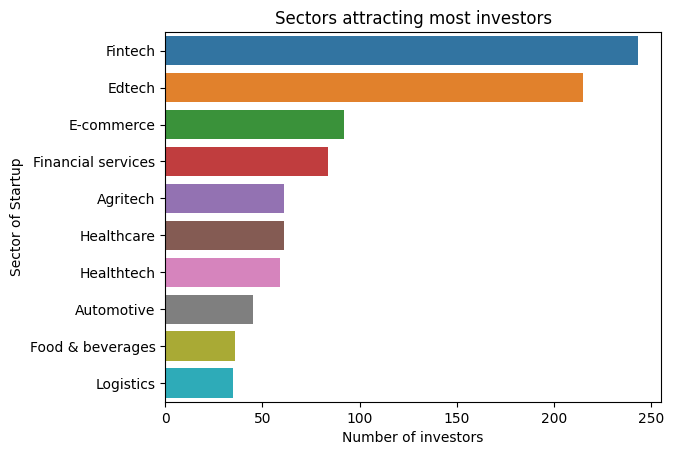

In [182]:

sns.barplot(data=sector_investor, x="Investor", y="Sector", orient="h")
plt.xlabel("Number of investors")
plt.ylabel("Sector of Startup")
plt.title("Sectors attracting most investors")
plt.show()

In [112]:
# Does the location of the startup affects investors interest in investing?

Location_amount = combined_df.groupby(["HeadQuarter"]).count()["Amount($)"].sort_values(ascending=False).reset_index().head(10)
Location_amount

,HeadQuarter,Amount($)
0,Bangalore,858
1,Mumbai,468
2,Gurugram,238
3,New Delhi,230
4,Chennai,106
5,Pune,104
6,Delhi,88
7,Noida,86
8,Gurgaon,80
9,Hyderabad,76


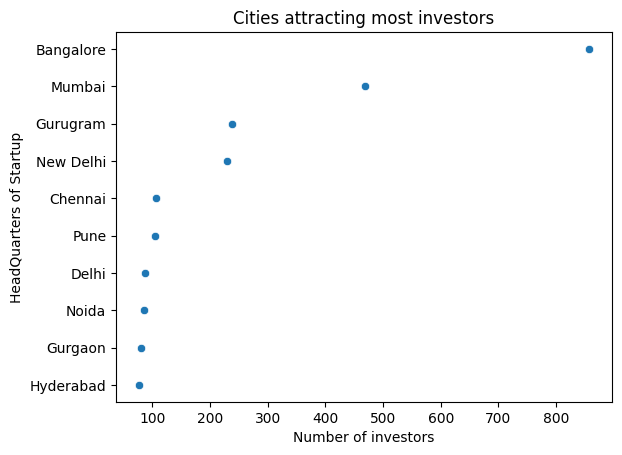

In [181]:
sns.scatterplot(data=Location_amount, x= "Amount($)", y="HeadQuarter")
plt.xlabel("Number of investors")
plt.ylabel("HeadQuarters of Startup")
plt.title("Cities attracting most investors")
plt.show()

In [113]:
# Which funding year saw investors investing more into startups?

Fundingyear_amount = combined_df.groupby(["Funding year"]).count()["Amount($)"].sort_values(ascending=False).reset_index()
Fundingyear_amount

,Funding year,Amount($)
0,2021,1189
1,2020,1052
2,2018,525
3,2019,89


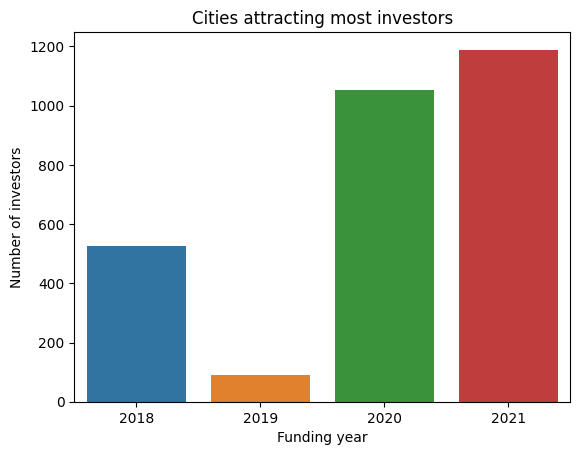

In [180]:
sns.barplot(data=Fundingyear_amount, x="Funding year", y="Amount($)",)
plt.ylabel("Number of investors")
plt.title("Cities attracting most investors")
plt.show()

In [114]:
# Which stage of funding receives the most funding?

Stage_amount = combined_df.groupby(["Stage"]).count()["Amount($)"].sort_values(ascending=False).reset_index().head(10)
Stage_amount


,Stage,Amount($)
0,Seed,358
1,Series A,304
2,Pre-series A,208
3,Series B,134
4,Series C,113
5,Seed Round,69
6,Pre series A,62
7,Pre-seed,58
8,Series D,50
9,Debt,45


<Figure size 1200x1000 with 0 Axes>

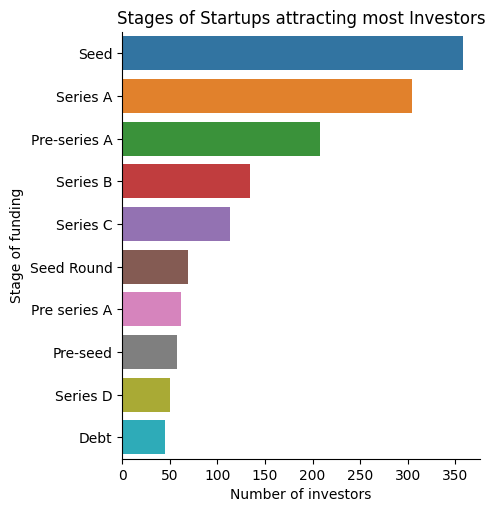

In [179]:
plt.figure(figsize=(12,10))
sns.catplot(data=Stage_amount, y="Stage", x="Amount($)", kind="bar")
plt.xlabel("Number of investors")
plt.ylabel("Stage of funding")
plt.title("Stages of Startups attracting most Investors")
plt.show()

In [169]:
# Does investment amount correlate with the age of the startups?

Amount_age = combined_df.groupby(["Founded"]).count()["Amount($)"].sort_values(ascending=False).reset_index().head(10)
Amount_age

,Founded,Amount($)
0,2015,135
1,2018,123
2,2019,104
3,2016,103
4,2017,92
5,2014,72
6,2020,42
7,2012,39
8,2013,36
9,2011,30


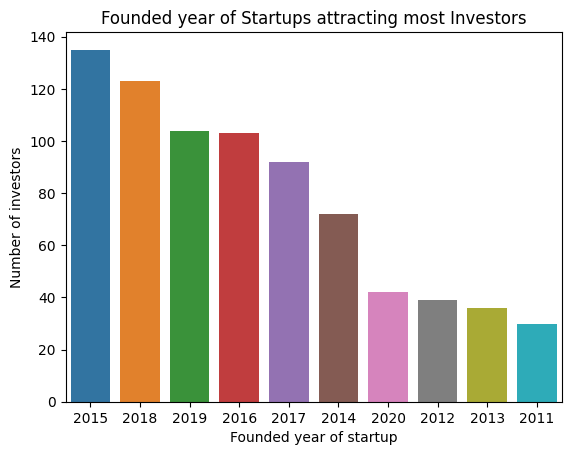

In [177]:
sns.barplot(data=Amount_age, x="Founded", y="Amount($)")
plt.xlabel("Founded year of startup")
plt.ylabel("Number of investors")
plt.title("Founded year of Startups attracting most Investors")
plt.show()

In [133]:
# Is there a relationship between investor amount, location of startup and industry of startup?


Correlation = combined_df.groupby(["Sector", "HeadQuarter"]).count()["Amount($)"].sort_values(ascending=False).reset_index().head(15)
Correlation

,Sector,HeadQuarter,Amount($)
0,Fintech,Bangalore,79
1,Edtech,Bangalore,76
2,Fintech,Mumbai,48
3,Financial services,Bangalore,33
4,Edtech,Mumbai,32
5,Fintech,Gurugram,27
6,Fintech,New Delhi,26
7,Edtech,Gurugram,26
8,Healthtech,Bangalore,20
9,Healthcare,Bangalore,20


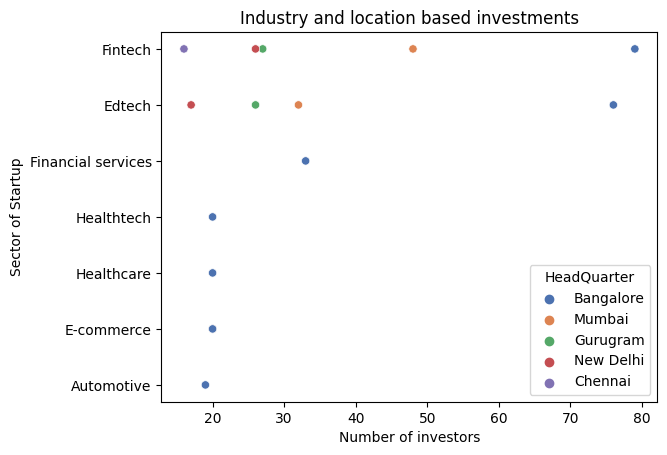

In [183]:
sns.scatterplot(data=Correlation, x="Amount($)", y="Sector", hue="HeadQuarter", palette="deep")
plt.xlabel("Number of investors")
plt.ylabel("Sector of Startup")
plt.title("Industry and location based investments")
plt.show()

# Feature processing
Here is the section to **clean** and **process** the features of the dataset.

## Missing/NaN Values
Handle the missing/NaN values using the Scikif-learn SimpleImputer

In [116]:
# Code Here

## Scaling
Scale the numeric features using the Scikif-learn StandardScaler, MinMaxScaler, or another Scaler.

In [117]:
# Code here

## Encoding
Encode the categorical features using the Scikif-learn OneHotEncoder.

In [118]:
# Code here